Original list: [51 64  7 15 86 10 65 42 37 86  6  5 33 86 20]
Merge Sort took 5.507e-05 seconds
Bubble Sort took 5.388e-05 seconds
Quick Sort took 4.721e-05 seconds


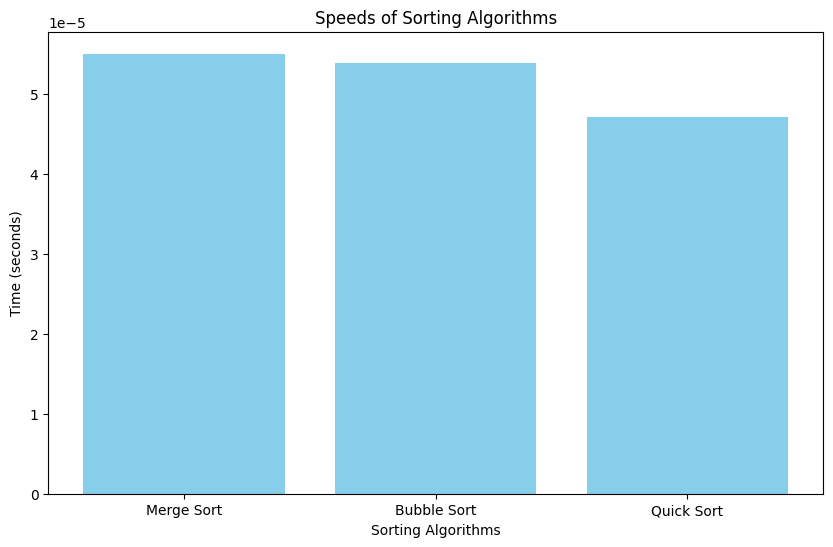

In [5]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

def quick_sort(list, low=None, high=None):
    def partition(low, high):
        pivot = list[high]
        i = low - 1

        for j in range(low, high):
            if list[j] < pivot:
                i += 1
                list[i], list[j] = list[j], list[i]
        list[i + 1], list[high] = list[high], list[i + 1]
        return i + 1
    if low is None:
        low = 0
    if high is None:
        high = len(list) - 1
    
    if low < high:
        part = partition(low, high)
        quick_sort(list, low, part - 1)
        quick_sort(list, part + 1, high)
        return list


def merge_sort(list):
    def merge(left, right):
        result = []
        L, R = 0, 0
        while L < len(left) and R < len(right):
            if left[L] < right[R]:
                result.append(left[L])
                L += 1
            else:
                result.append(right[R])
                R += 1
        result.extend(left[L:])
        result.extend(right[R:])
        return result
    if len(list) <= 1:
        return list
    mid = len(list) // 2
    left = merge_sort(list[:mid])
    right = merge_sort(list[mid:])
    return merge(left, right)
    

def bubble_sort(list):
    for i in range(len(list)):
        for j in range(len(list) - 1):
            if list[j] > list[j + 1]:
                list[j], list[j + 1] = list[j + 1], list[j]
    return list

class Algorithm:
    def __init__(self, name, function):
        self.name = name
        self.function = function
    
    def __call__(self, list):
        start = time.time()
        ret = self.function(list)
        end = time.time()
        print(f'{self.name} took {(end - start):.04} seconds')
        # print(ret)
        return end - start


# Example data
algorithms = [Algorithm('Merge Sort', merge_sort), Algorithm('Bubble Sort', bubble_sort), Algorithm('Quick Sort', quick_sort)]
unsorted = np.int32(np.random.randint(0, 100, 15))
print(f"Original list: {unsorted}")
speeds = [x(unsorted) for x in algorithms]  # Example times in seconds

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar([algo.name for algo in algorithms], speeds, color='skyblue')
plt.xlabel('Sorting Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Speeds of Sorting Algorithms')
plt.show()